# Notebook of Summary, Visualization, and Illustration

## 1. Summary of the Paper

Prediction of in-patient **length of stay (LoS)** is an important and difficult task - as it accounts for about 90% of inter-patient variation in hospital costs in the US, and is also associated with more serious outcomes like infections and fatality. Prediction of good length of stay estimates promises various benefits:
 - Increased accuracy of predictions, which can enable more sophisticated planning strategies.
 - Reduced administrative burden on clinicians,freeing them up to focus on patient care.
 - Improved patient experiences, as patients are more likely to be discharged on time and have a better understanding of their discharge date.
 
However, there are many challenges in gathering the data required and developing models for making these predictions. Rocheteau et al. (2020) proposes a new model - Temporal Pointwise Convolution (TPC) - which aims to mitigate challenges with EHR data, such as data skew, missing data, and irregular sampling. The model claims to provide a significant performance benefit of 18-68% over LSTM networks and Transformers.

## 2. Overview of the Data

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from eICU_preprocessing.reader import eICUReader
from MIMIC_preprocessing.reader import MIMICReader
from eICU_preprocessing.run_all_preprocessing import eICU_path
from MIMIC_preprocessing.run_all_preprocessing import MIMIC_path

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [3]:
eICU_path, MIMIC_path

('D:/datasets/eicu/', 'D:/datasets/mimic-iv-0.4/')

In [4]:
eicu_reader = eICUReader(eICU_path + 'train', device = device)
mimic_reader = MIMICReader(MIMIC_path + 'train', device = device)

### 2.1. Length of Stay Distribution

#### 2.1.1. eICU

Data Count:  102749


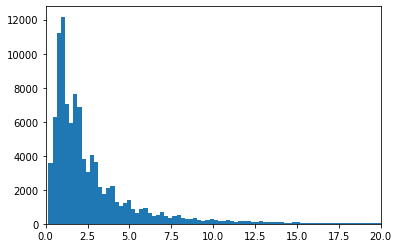

In [5]:
plt.hist(eicu_reader.labels.actualiculos, bins=1000)
plt.xlim([0,20])
print("Data Count: ", len(eicu_reader.labels.actualiculos))
plt.show()

#### 2.1.2. MIMIC-IV

Data Count:  48848


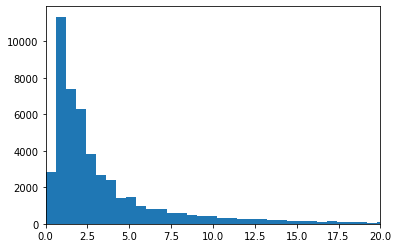

In [6]:
plt.hist(mimic_reader.labels.actualiculos, bins=1000)
plt.xlim([0,20])
print("Data Count: ", len(mimic_reader.labels.actualiculos))
plt.show()

MIMIC-IV has less data than eICU, but overall shape is similar.

## 3. Overview of the Methods and Experiments

### 3.1. Code Examples

In [7]:
import time

**TPC Model Type**
 - `tpc` : Temporal Pointwise Convolution
 - `temp_only` : Temporal Convolution Only
 - `pointwise_only` : Pointwise Convolution Only

In [ ]:
start = time.time()
!python -m models.run_tpc --model_type pointwise_only --mode test --n_layers 4 --kernel_size 3 --n_epochs 5
end = time.time()
print(f"{(end - start)/60:.2f} min")

In [ ]:
start = time.time()
!python -m models.run_tpc --model_type temp_only --mode test --n_layers 4 --kernel_size 3 --n_epochs 5
end = time.time()
print(f"{(end - start)/60:.2f} min")

In [ ]:
start = time.time()
!python -m models.run_tpc --model_type tpc --mode test --n_layers 4 --kernel_size 3 --n_epochs 5
end = time.time()
print(f"{(end - start)/60:.2f} min")

In [ ]:
start = time.time()
!python -m models.run_lstm --mode test --n_layers 4 --n_epochs 5
end = time.time()
print(f"{(end - start)/60:.2f} min")

In [ ]:
start = time.time()
!python -m models.run_transformer --mode test --n_layers 4 --n_epochs 5 --feedforward_size 64
end = time.time()
print(f"{(end - start)/60:.2f} min")

## 4. Summary of the Key Results

## References
 - link1
 - link2
 - ...